### Importing Required Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

### Importing Libraries for Prediction

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Loading Dataset

In [6]:
data = pd.read_csv("./diabetes_dataset.csv")

### Checing For Missing Values

<Axes: >

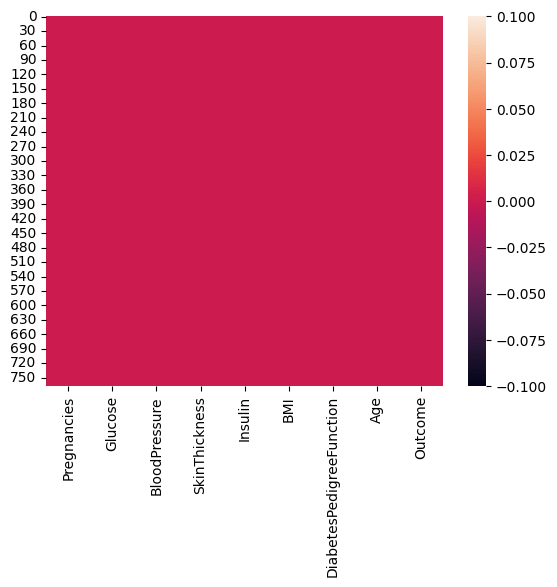

In [7]:
sns.heatmap(data.isnull())

### Show data

In [8]:
data.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


#### Number of rows and columns

In [9]:
data.shape

(768, 9)

#### Statistical measure of data

In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Total diabetic and Total non-diabetic
##### 0 - Non-Diabetic  1 - Diabetic

In [11]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### Co Relation Matrix

In [13]:
corelation = data.corr()

In [14]:
print(corelation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

### Visualizing Corealtion Matrix

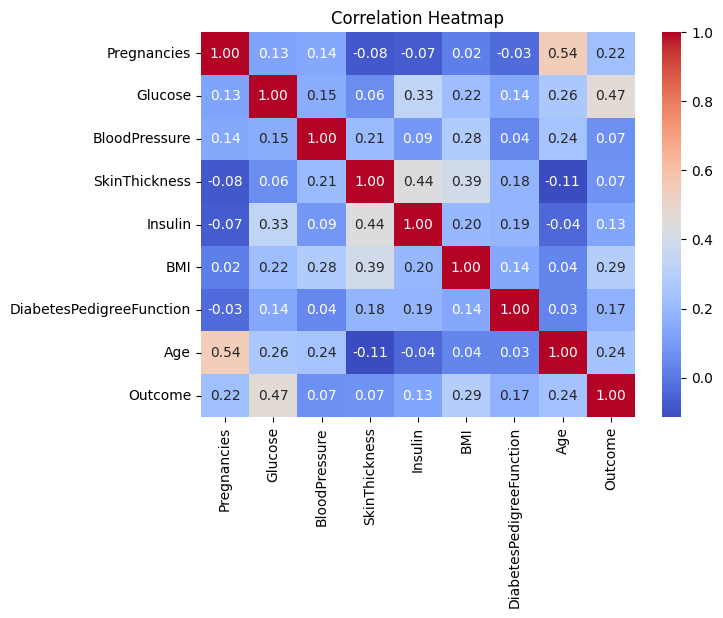

In [15]:
plt.figure(figsize=(7, 5)) 
sns.heatmap(corelation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Training Model

In [16]:
X = data.drop("Outcome", axis=1)
Y = data['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

### Making Prediction 

In [18]:
Prediction = model.predict(X_test)

In [19]:
print(Prediction)

[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 1]


In [20]:
accuracy = accuracy_score(Prediction, Y_test)

In [21]:
print(accuracy)

0.7337662337662337
